In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'train.csv'
data = pd.read_csv(url , sep = ',')

In [3]:
data.head()

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [4]:
data.tail()

,TweetClass,TweetID,TweetText
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [5]:
data.index

RangeIndex(start=0, stop=18233, step=1)

In [6]:
data.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


In [8]:
data.shape

(18233, 3)

In [9]:
data.TweetClass.value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

In [10]:
data.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

In [11]:
data[data['TweetText'].isnull() == True]

,TweetClass,TweetID,TweetText
2350,0,591929055093600257,NaN
2540,0,591942970808623104,NaN
2560,0,591945954544066561,NaN
4365,0,592165223047536640,NaN
4418,0,592164390373326848,NaN
4590,0,592182797743333376,NaN
4798,0,592200613863108608,NaN
5213,0,592228742388256768,NaN
5983,0,592268471653793792,NaN


In [12]:
data = data.dropna(axis = 0)

In [13]:
data.isnull().sum()

TweetClass    0
TweetID       0
TweetText     0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18224 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18224 non-null int64
TweetID       18224 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 569.5+ KB


In [15]:
sns.set(style = 'darkgrid')

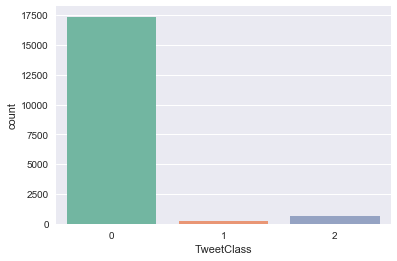

In [16]:
sns.countplot(x = 'TweetClass' , data = data , palette = 'Set2')

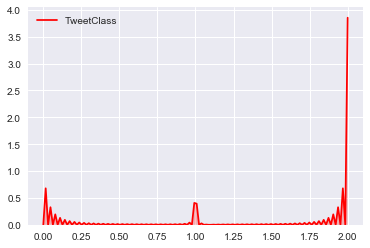

In [17]:
sns.kdeplot(data = data.TweetClass , color = 'red' , shade = True , kernel = 'gau' , legend = True)

In [18]:
irr_df = data[data['TweetClass'] == 0]
print(irr_df.shape)
irr_df.head()

(17361, 3)


,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [19]:
demand_df = data[data['TweetClass'] == 1]
print(demand_df.shape)
demand_df.head()

(199, 3)


,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...


In [20]:
supply_df = data[data['TweetClass'] == 2]
print(supply_df.shape)
supply_df.head()

(664, 3)


,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'orange' , width=1600 , height=800)

In [23]:
vect0 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_irr_dtm = vect0.fit_transform(irr_df['TweetText'])
irr_result = dict(zip(vect0.get_feature_names(),raw_irr_dtm.sum(axis = 0).A1))

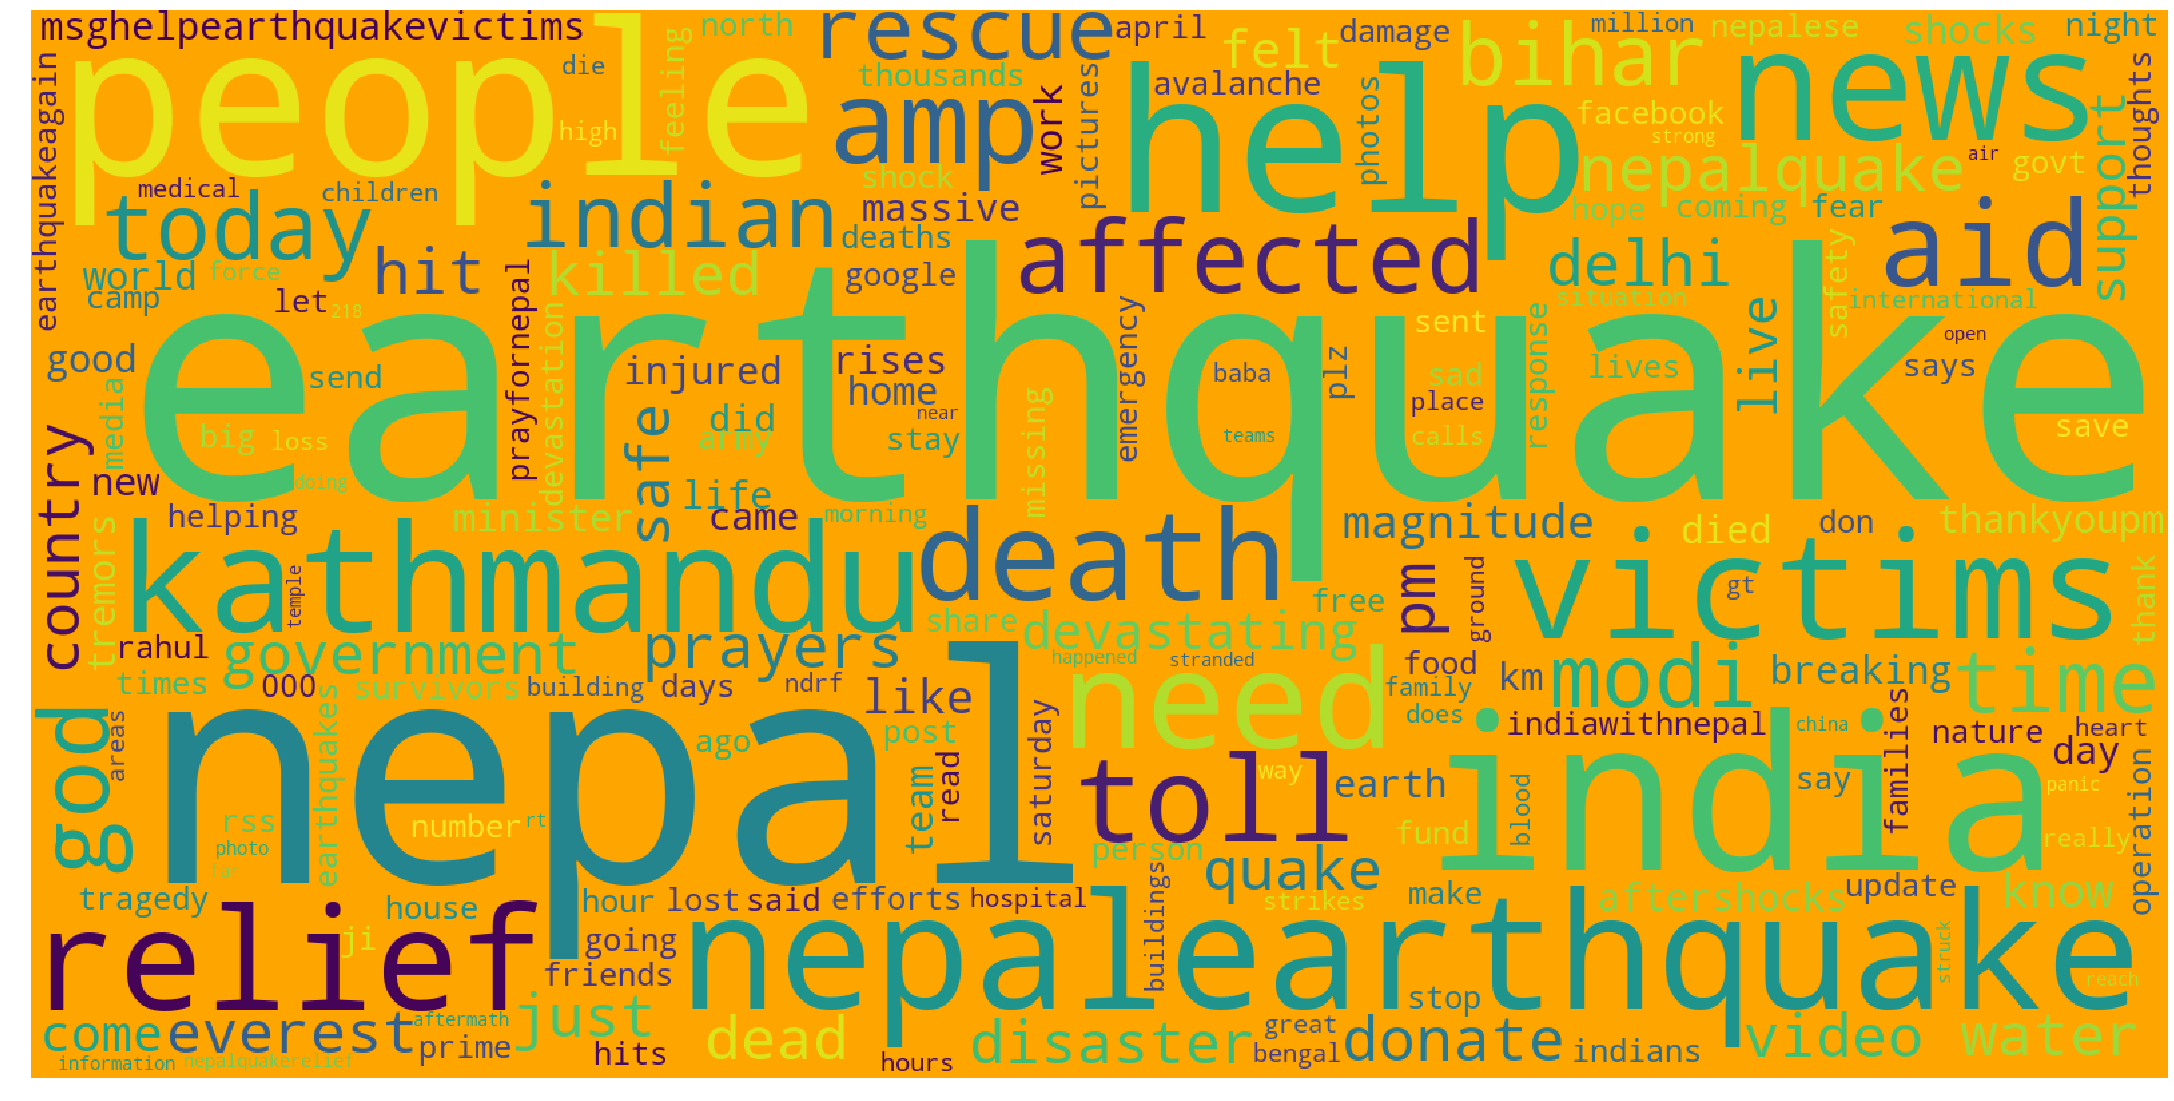

In [24]:
wc0 = wc.generate_from_frequencies(irr_result)
plt.figure(figsize = (30,20))
plt.imshow(wc0)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig("irr_df_wordcloud.png")

In [25]:
vect1 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_demand_dtm = vect1.fit_transform(demand_df['TweetText'])
demand_result = dict(zip(vect1.get_feature_names(),raw_demand_dtm.sum(axis = 0).A1))

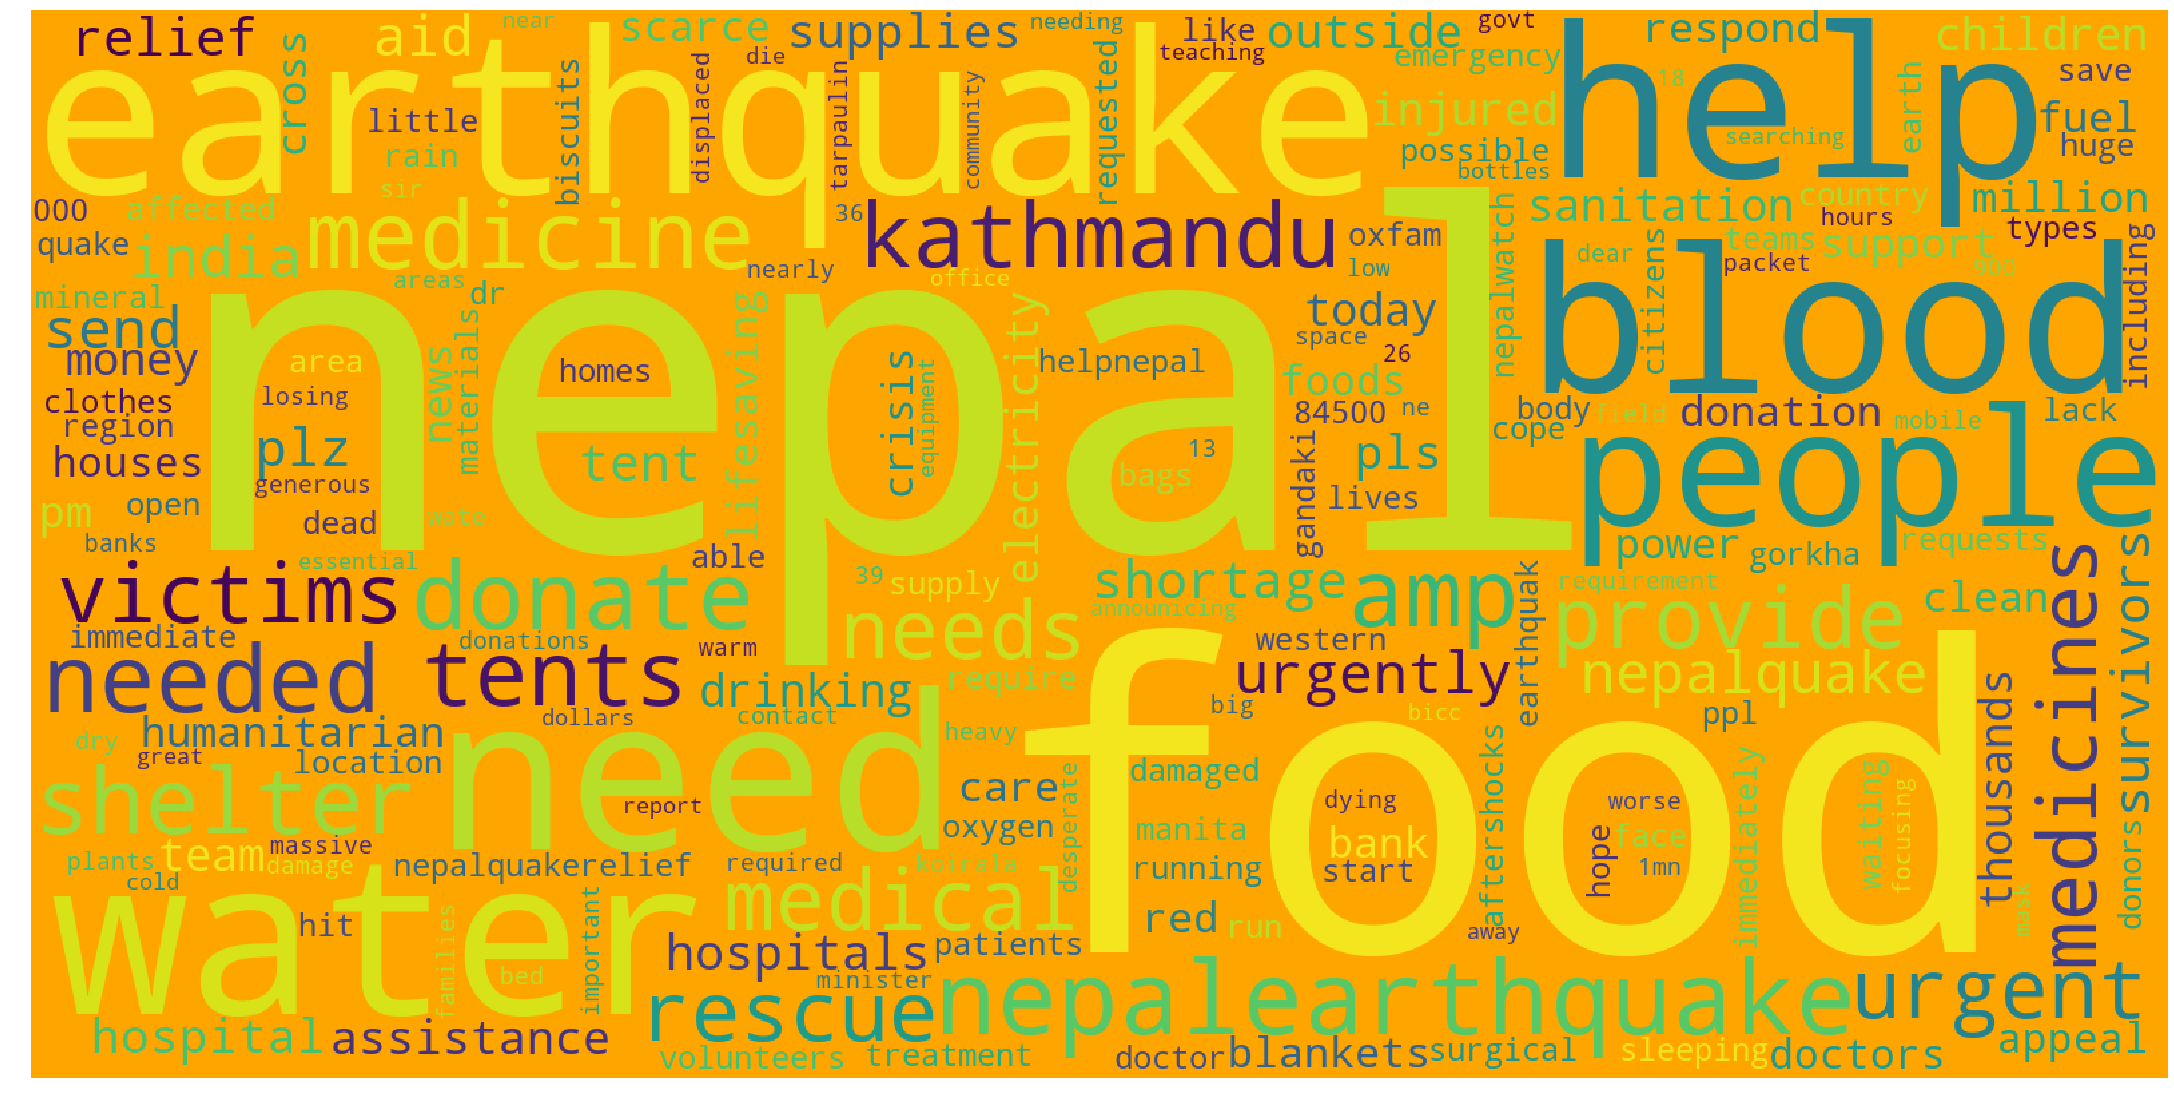

In [26]:
wc1 = wc.generate_from_frequencies(demand_result)
plt.figure(figsize = (30,20))
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig("demand_df_wordcloud.png")

In [27]:
vect2 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,1),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
raw_supply_dtm = vect2.fit_transform(supply_df['TweetText'].values.astype('U'))
supply_result = dict(zip(vect2.get_feature_names(),raw_supply_dtm.sum(axis = 0).A1))

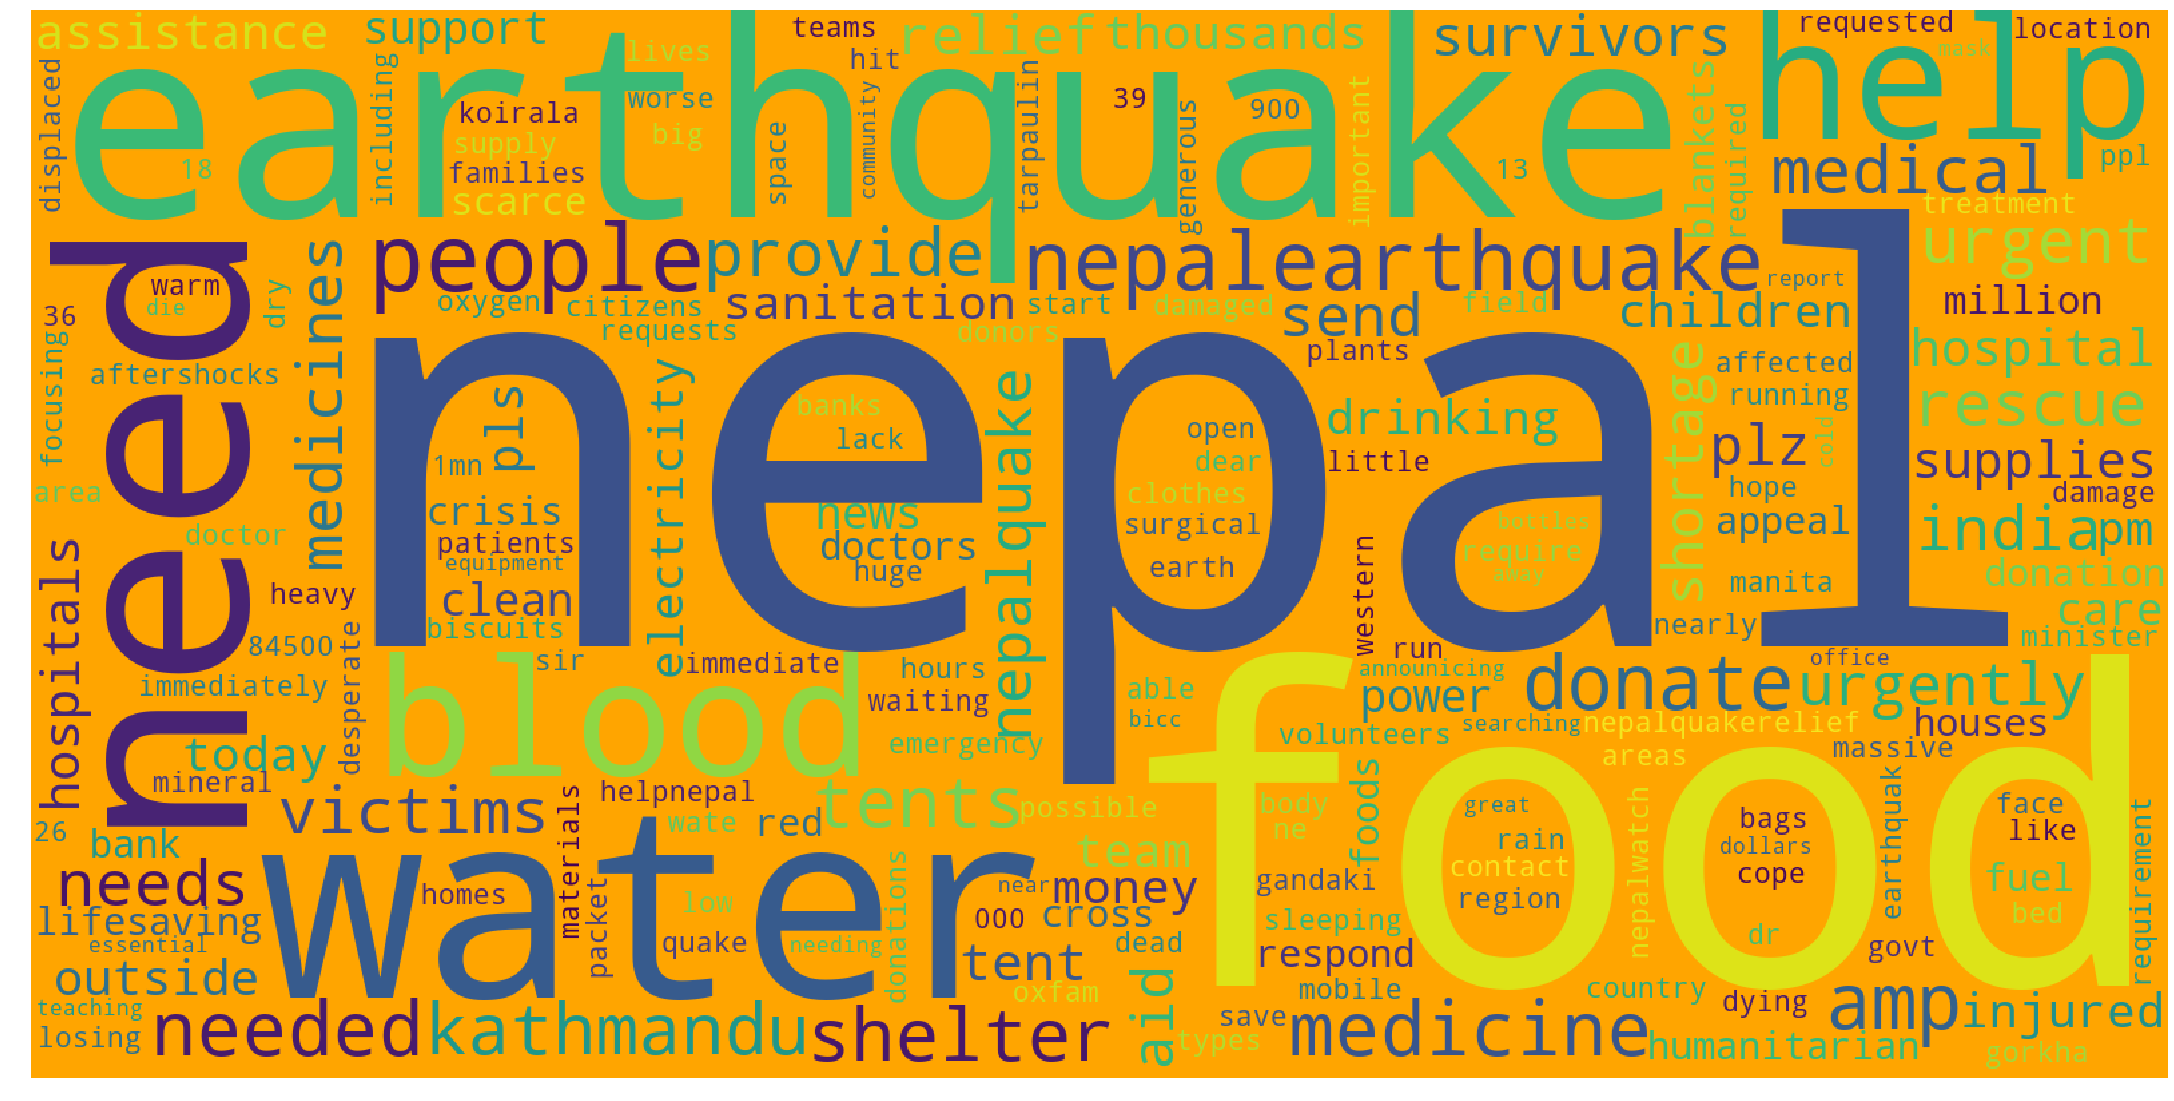

In [28]:
wc2 = wc.generate_from_frequencies(demand_result)
plt.figure(figsize = (30,20))
plt.imshow(wc2)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig("supply_df_wordcloud.png")

In [29]:
data.TweetClass.value_counts()

0    17361
2      664
1      199
Name: TweetClass, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit

In [31]:
#train , test = train_test_split(data , train_size = 0.75 , test_size = 0.25 , random_state = 0 , stratify = y)
#x_train = train['TweetText']
#y_train = train['TweetClass']
#x_test = test['TweetText']
#y_test = test['TweetClass']

In [32]:
sss = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.4 , random_state = 42)

In [33]:
for train_index, test_index in sss.split(data['TweetText'] , data['TweetClass']):
    x_train, x_test = data['TweetText'].iloc[train_index], data['TweetText'].iloc[test_index]
    y_train, y_test = data['TweetClass'].iloc[train_index], data['TweetClass'].iloc[test_index]

In [35]:
vect3 = TfidfVectorizer(encoding= 'utf-8',ngram_range= (1,3),stop_words= 'english',lowercase= True,min_df= 1,use_idf= True)
dtm_x_train = vect3.fit_transform(x_train)
dtm_x_test = vect3.transform(x_test)
vect3.vocabulary_

{'breaking': 13410,
 'news': 82501,
 'caused': 16226,
 'nepal': 76590,
 'earthquake': 29910,
 'al': 5073,
 'jazeera': 59487,
 'english': 37964,
 'breaking news': 13519,
 'news caused': 82611,
 'caused nepal': 16277,
 'nepal earthquake': 77561,
 'earthquake al': 30169,
 'al jazeera': 5076,
 'jazeera english': 59488,
 'breaking news caused': 13524,
 'news caused nepal': 82612,
 'caused nepal earthquake': 16278,
 'nepal earthquake al': 77595,
 'earthquake al jazeera': 30170,
 'al jazeera english': 5077,
 'come': 18963,
 'anytym': 6779,
 'anywhr': 6782,
 'amp': 5574,
 'swallow': 114332,
 'relationship': 97765,
 'christ': 17690,
 'swallowed': 114336,
 'death': 23977,
 'best': 10915,
 'preps': 93098,
 'icor15': 54787,
 '54': 1674,
 'earthquake come': 30798,
 'come anytym': 18977,
 'anytym anywhr': 6780,
 'anywhr amp': 6783,
 'amp swallow': 6208,
 'swallow relationship': 114334,
 'relationship christ': 97766,
 'christ swallowed': 17701,
 'swallowed death': 114337,
 'death best': 23988,
 'best

In [36]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB(alpha = 1.0 , fit_prior = True , class_prior = None)

In [37]:
model1.fit(dtm_x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
y_pred = model1.predict(dtm_x_test)

In [39]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [40]:
print(confusion_matrix(y_test , y_pred))

[[6942    0    3]
 [  79    0    0]
 [ 250    0   16]]


In [41]:
print(classification_report(y_test , y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      6945
          1       0.00      0.00      0.00        79
          2       0.84      0.06      0.11       266

avg / total       0.94      0.95      0.93      7290



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
print(accuracy_score(y_test , y_pred))

0.954458161866


In [43]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [44]:
model2=rfc(n_estimators=35,criterion='gini',class_weight='balanced',max_depth=5,n_jobs=2,min_samples_leaf=6,random_state=29)

In [45]:
model2.fit(dtm_x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=2, oob_score=False, random_state=29,
            verbose=0, warm_start=False)

In [46]:
y_pred2 = model2.predict(dtm_x_test)

In [47]:
print(confusion_matrix(y_test , y_pred2))

[[5735  848  362]
 [  21   54    4]
 [  70   29  167]]


In [48]:
print(classification_report(y_test , y_pred2))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90      6945
          1       0.06      0.68      0.11        79
          2       0.31      0.63      0.42       266

avg / total       0.95      0.82      0.87      7290



In [49]:
print(accuracy_score(y_test , y_pred2))

0.817009602195


In [56]:
from sklearn.cluster import KMeans
model3 = KMeans(n_clusters = 3 , algorithm = 'full' , n_jobs = 2 , random_state = 42 , precompute_distances = 'auto')

In [57]:
model3.fit(dtm_x_train , y_train)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [58]:
y_pred3 = model3.predict(dtm_x_test)

In [59]:
print(confusion_matrix(y_test , y_pred3))

[[ 573 1429 4943]
 [  20    6   53]
 [  20   26  220]]


In [60]:
print(classification_report(y_test , y_pred3))

             precision    recall  f1-score   support

          0       0.93      0.08      0.15      6945
          1       0.00      0.08      0.01        79
          2       0.04      0.83      0.08       266

avg / total       0.89      0.11      0.15      7290



In [61]:
print(accuracy_score(y_test , y_pred3))

0.109602194787
